# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 49kB/s 
     |████████████████████████████████| 3.8MB 36.3MB/s 
     |████████████████████████████████| 450kB 32.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=4037293ddc41a54c0c3de086f7771e0530db1c5848786e42b045490ded9456cc
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0


## Get Required Files from Drive

In [38]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [39]:
#Set your project path 
project_path =  '/content/drive/My Drive/Projects/SequentialNLP/'
data_folder = '/content/drive/My Drive/Projects/SequentialNLP/Sarcasm_data/'

In [40]:
%cd '$project_path'

/content/drive/My Drive/Projects/SequentialNLP


#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [41]:
import pandas as pd

In [42]:
df=pd.read_json(data_folder+"Sarcasm_Headlines_Dataset.json",lines=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [44]:
df.drop('article_link',axis=1,inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


In [46]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [47]:
import numpy as np

In [48]:
max_length=np.max(df.headline.str.len())
df['headline']=df.headline.str.pad(max_length, side='right', fillchar=' ')

In [49]:
print(max_length)

254


In [50]:
df['headline']

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704    american politics in moral free-fall          ...
26705    america's best 20 hikes                       ...
26706    reparations and obama                         ...
26707    israeli ban targeting boycott supporters raise...
26708    gourmet gifts for the foodie 2014             ...
Name: headline, Length: 26709, dtype: object

#**## Modelling**

## Import required modules required for modelling.

In [51]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [52]:
max_features = 10000
maxlen = max_length
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [53]:
tk=Tokenizer(num_words=max_features)

In [54]:
tk.fit_on_texts(list(df['headline']))

# Define X and y for your model.

In [55]:
from keras.utils import to_categorical

In [56]:
X = tk.texts_to_sequences(list(df['headline']))
X = pad_sequences(X, maxlen = maxlen)
#y = np.asarray(df['is_sarcastic'])
y=to_categorical(df["is_sarcastic"].values)
print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

In [57]:
print("The number of unique words in the text corpus dictionary : {}".format(len(tk.word_index)))
print("The shape of the trainable data : {}".format(X.shape))
print("The shape of the labels for the data is : {}".format(y.shape))

The number of unique words in the text corpus dictionary : 29656
The shape of the trainable data : (26709, 254)
The shape of the labels for the data is : (26709, 2)


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [58]:
print(f'word_index: {tk.word_index}')
print(f'vocabulary: {tk.word_index.keys()}')
text = [key for key in tk.word_index.keys()]
print(f'keys: {text}: {tk.texts_to_sequences(text)}')
num_words = len(tk.word_index) + 1

word_index: {'to': 1, 'of': 2, 'the': 3, 'in': 4, 'for': 5, 'a': 6, 'on': 7, 'and': 8, 'with': 9, 'is': 10, 'new': 11, 'trump': 12, 'man': 13, 'from': 14, 'at': 15, 'about': 16, 'you': 17, 'this': 18, 'by': 19, 'after': 20, 'up': 21, 'out': 22, 'be': 23, 'how': 24, 'as': 25, 'it': 26, 'that': 27, 'not': 28, 'are': 29, 'your': 30, 'his': 31, 'what': 32, 'he': 33, 'all': 34, 'just': 35, 'who': 36, 'has': 37, 'will': 38, 'more': 39, 'one': 40, 'into': 41, 'report': 42, 'year': 43, 'why': 44, 'have': 45, 'area': 46, 'over': 47, 'donald': 48, 'u': 49, 'day': 50, 'says': 51, 's': 52, 'can': 53, 'first': 54, 'woman': 55, 'time': 56, 'like': 57, 'her': 58, "trump's": 59, 'old': 60, 'no': 61, 'get': 62, 'off': 63, 'an': 64, 'life': 65, 'people': 66, 'obama': 67, 'now': 68, 'house': 69, 'still': 70, "'": 71, 'women': 72, 'make': 73, 'was': 74, 'than': 75, 'white': 76, 'back': 77, 'my': 78, 'i': 79, 'clinton': 80, 'down': 81, 'if': 82, '5': 83, 'when': 84, 'world': 85, 'could': 86, 'we': 87, 'the

In [59]:
print(num_words)

29657


#**## Word Embedding**

## Get Glove Word Embeddings

In [24]:
glove_file = project_path + "glove.6B.zip"

In [25]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [60]:
!pwd

/content/drive/My Drive/Projects/SequentialNLP


In [61]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# Create a weight matrix for words in training docs

In [62]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tk.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

In [63]:
y.shape

(26709, 2)

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [64]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM, Bidirectional, Conv1D, MaxPooling1D 
from keras.layers import Embedding
from keras.initializers import Constant

In [65]:
#Creating the embedding layer further with the help of keras
#These embeddings are made non-trainable as they are pre trained to highly optimized values
max_sentence_len=X.shape[1]
embeddings=Embedding(num_words,embedding_size,input_length=max_sentence_len,weights=[embedding_matrix],trainable=False)
#Getting the shape of the embedding matrix (should be (num_words,embedding_dim)=(20000,300))
print("The shape of the embedding matrix is {}".format(embedding_matrix.shape))


The shape of the embedding matrix is (29657, 200)


In [66]:
model=Sequential()
model.add(embeddings)
model.add(Conv1D(32,3,activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Flatten())
model.add(Dense(30,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [67]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 254, 200)          5931400   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 252, 32)           19232     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 126, 32)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 126, 32)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 126, 256)          164864    
_________________________________________________________________
flatten_2 (Flatten)          (None, 32256)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)               

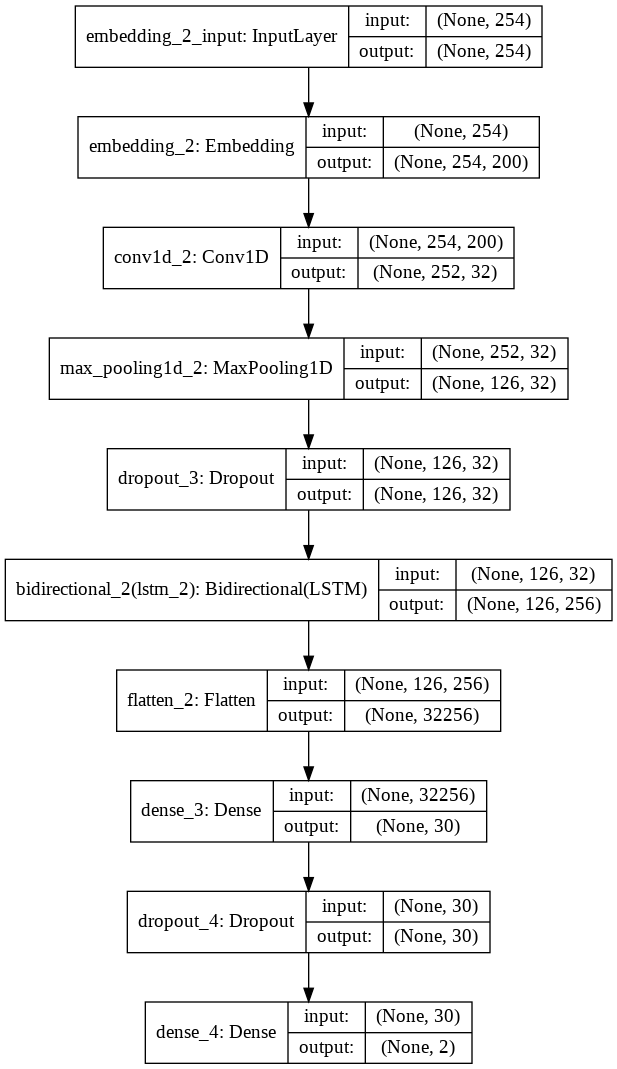

In [68]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [69]:
#Splittting the data into training and testing sets before fitting the model
#Using a 80% - 20% split for the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [70]:
x_train.shape

(21367, 254)

In [71]:
batch_size=100 #Using a batch size of 100, during gradient descent
num_epochs=5 #Number of iterations/epochs over the training set

history=model.fit(x_train,y_train,batch_size=batch_size,epochs=num_epochs,validation_data=(x_test,y_test))

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 233s 11ms/step - loss: 0.5682 - accuracy: 0.7033 - val_loss: 0.4312 - val_accuracy: 0.7993
Epoch 2/5
21367/21367 [==============================] - 233s 11ms/step - loss: 0.4564 - accuracy: 0.7935 - val_loss: 0.3945 - val_accuracy: 0.8243
Epoch 3/5
21367/21367 [==============================] - 232s 11ms/step - loss: 0.4118 - accuracy: 0.8141 - val_loss: 0.3711 - val_accuracy: 0.8290
Epoch 4/5
21367/21367 [==============================] - 233s 11ms/step - loss: 0.3924 - accuracy: 0.8273 - val_loss: 0.3534 - val_accuracy: 0.8429
Epoch 5/5
21367/21367 [==============================] - 233s 11ms/step - loss: 0.3741 - accuracy: 0.8393 - val_loss: 0.3560 - val_accuracy: 0.8399


In [87]:
batch_size=200 #Using a batch size of 200, for better accuracy
num_epochs=80 #Number of iterations/epochs over the training set

history=model.fit(x_train,y_train,batch_size=batch_size,epochs=num_epochs,validation_data=(x_test,y_test))

Train on 21367 samples, validate on 5342 samples
Epoch 1/80
21367/21367 [==============================] - 208s 10ms/step - loss: 0.2651 - accuracy: 0.8914 - val_loss: 0.3377 - val_accuracy: 0.8567
Epoch 2/80
21367/21367 [==============================] - 208s 10ms/step - loss: 0.2626 - accuracy: 0.8921 - val_loss: 0.3399 - val_accuracy: 0.8584
Epoch 3/80
21367/21367 [==============================] - 208s 10ms/step - loss: 0.2568 - accuracy: 0.8931 - val_loss: 0.3404 - val_accuracy: 0.8524
Epoch 4/80
21367/21367 [==============================] - 209s 10ms/step - loss: 0.2523 - accuracy: 0.8939 - val_loss: 0.3478 - val_accuracy: 0.8575
Epoch 5/80
21367/21367 [==============================] - 208s 10ms/step - loss: 0.2535 - accuracy: 0.8946 - val_loss: 0.3521 - val_accuracy: 0.8564
Epoch 6/80
21367/21367 [==============================] - 209s 10ms/step - loss: 0.2508 - accuracy: 0.8987 - val_loss: 0.3515 - val_accuracy: 0.8552
Epoch 7/80
21367/21367 [==============================] -

In [82]:
#Saving the model to the disk
model_json = model.to_json()
with open("model_sarcasmdetection.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_sarcasmdetection.h5")

In [83]:
test_performance=model.evaluate(x_test,y_test)
print("The loss of the model on the test set : {}".format(test_performance[0]))
print("The accuracy of the model on the test set : {}%".format(test_performance[1]*100))

5342/5342 [==============================] - 22s 4ms/step
The loss of the model on the test set : 0.3365909960643935
The accuracy of the model on the test set : 85.35192608833313%


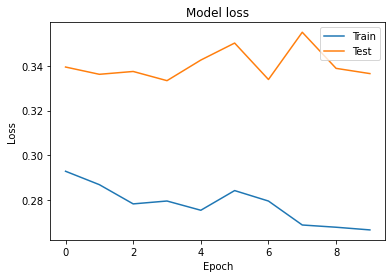

In [84]:
import matplotlib.pyplot as plt
#Visualising the loss of the model, throughout the training process
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig("modelloss_sarcasmdetection.jpg")

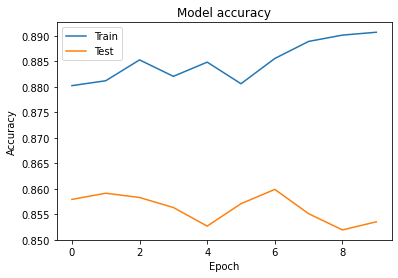

In [85]:
#Visualising the accuracy of the model, throughout the training process
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("modelacc_sarcasmdetection.jpg")

In [88]:
#Checking the validity of this model on some own made up headlines

#my_headline1="Of course you meant that" #Meant to be sarcastic
my_headline2="The facts imply that the suspect used a gun" #Meant to be non-sarcastic
my_headline3="It looks like Trump is very affectionate" #Meant to be sarcastic
my_headline1="the 'roseanne' revival catches up " #Meant to be non-sarcastic
my_headline4="The economy is on the brink of collapse" #Meant to be non-sarcastic
#my_headline4="The economy is at its best" #Meant to be non-sarcastic
my_headline11=tk.texts_to_sequences(my_headline1)
my_headline22=tk.texts_to_sequences(my_headline2)
my_headline33=tk.texts_to_sequences(my_headline3)
my_headline44=tk.texts_to_sequences(my_headline4)

my_headline11=pad_sequences(my_headline11,maxlen=max_sentence_len,dtype="int32",value=0)
my_headline22=pad_sequences(my_headline22,maxlen=max_sentence_len,dtype="int32",value=0)
my_headline33=pad_sequences(my_headline33,maxlen=max_sentence_len,dtype="int32",value=0)
my_headline44=pad_sequences(my_headline44,maxlen=max_sentence_len,dtype="int32",value=0)

prediction1=model.predict(my_headline11,batch_size=1)[0]
prediction2=model.predict(my_headline22,batch_size=1)[0]
prediction3=model.predict(my_headline33,batch_size=1)[0]
prediction4=model.predict(my_headline44,batch_size=1)[0]

if np.argmax(prediction1)==1:
    print("The headline - " + my_headline1 + " : Not Sarcastic")
else:
    print("The headline - " + my_headline1 + " : Sarcastic")
    
if np.argmax(prediction2)==1:
    print("The headline - " + my_headline2 + " : Not Sarcastic")
else:
    print("The headline - " + my_headline2 + " : Sarcastic")

if np.argmax(prediction3)==1:
    print("The headline - " + my_headline3 + " : Not Sarcastic")
else:
    print("The headline - " + my_headline3 + " : Sarcastic")
    
if np.argmax(prediction4)==1:
    print("The headline - " + my_headline4 + " : Not Sarcastic")
else:
    print("The headline - " + my_headline4 + " : Sarcastic")

The headline - the 'roseanne' revival catches up  : Not Sarcastic
The headline - The facts imply that the suspect used a gun : Not Sarcastic
The headline - It looks like Trump is very affectionate : Sarcastic
The headline - The economy is on the brink of collapse : Not Sarcastic
